In [1]:
import os, cv2, sys
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# labels = pd.read_csv('Downloads/archive/train.csv')
# labels = labels.iloc[:, 2:4]

# images_dir = 'Downloads/archive/Tomato_images/Tomato_images'

    
# for filename, classname in labels.values:
#     if not os.path.exists(DR + str(classname)):
#         os.mkdir(DR + str(classname))
    
#     src_path = images_dir + '/' + filename
#     dst_path = DR + str(classname) + '/' + filename + '.jpg'
    
#     try:
#         shutil.copy(src_path, dst_path)
#         print("sucessful")
#     except IOError as e:
#         print('Unable to copy file {} to {}'
#               .format(src_path, dst_path))
#     except:
#         print('When try copy file {} to {}, unexpected error: {}'
#               .format(src_path, dst_path, sys.exc_info()))
    
    
    

In [53]:
# categories = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
width = 80
height = 80
path = 'Downloads/archive/Tomato_images'
X = []
y = []
categories = os.listdir(path)
for  category in categories:
    folder_path = os.path.join(path, category)
    img_names = os.listdir(folder_path)
    for img_name in img_names:
        full_path = os.path.join(path, category, img_name)
        try:
            img = cv2.imread(full_path, 0)
            img = cv2.resize(img, (height, width))
            img_feature = np.reshape(img, (height*width))
            X.append(img_feature)
            y.append(category)
        except:
            print("Error")
            
imgs = np.array(X)
lbls = np.array(y)

le = LabelEncoder()
le.fit(lbls)
lbls_encoded = le.transform(lbls)

X_train, X_test, y_train, y_test = train_test_split(imgs, lbls_encoded, test_size=0.2,random_state=42)

# X_train, X_test = X_train / 255.0, X_test / 255.0

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
            

In [96]:
from keras.callbacks import History
history=History()

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs = 3,validation_data=(X_test,y_test),callbacks=[history])

Epoch 1/3
93/93 [==============================] - 4s 28ms/step - loss: 0.6729 - accuracy: 0.8679 - val_loss: 0.5920 - val_accuracy: 0.8777- loss: 0.8174 - accuracy - ETA: 0s - loss: 0.7779 - accuracy - ETA: 0s - loss: 0.7079 - ac
Epoch 2/3
93/93 [==============================] - 2s 22ms/step - loss: 0.1755 - accuracy: 0.9475 - val_loss: 0.2623 - val_accuracy: 0.9422
Epoch 3/3
93/93 [==============================] - 2s 22ms/step - loss: 0.0719 - accuracy: 0.9758 - val_loss: 0.1806 - val_accuracy: 0.9543


In [97]:
y_pred = np.argmax(model.predict(X_test), axis=1)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9543010752688172

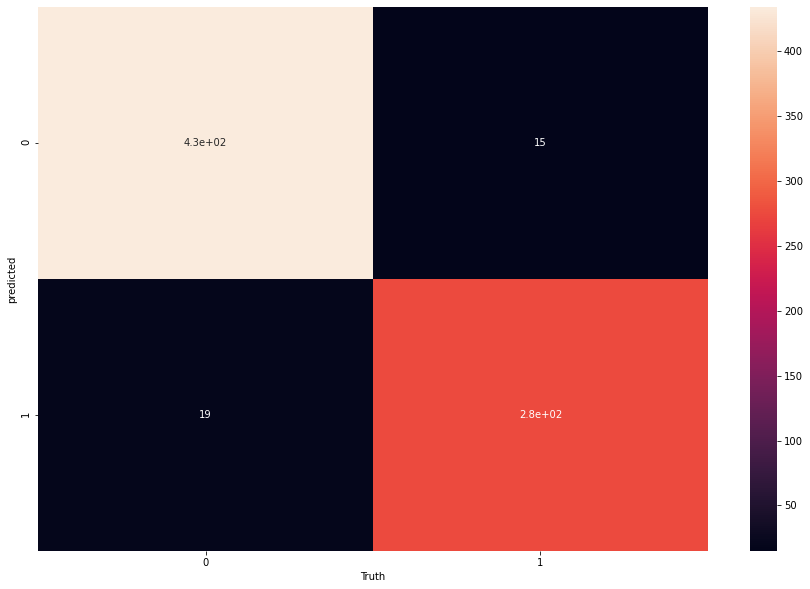

In [99]:
import seaborn as sn
plt.figure(figsize=(15,10))
sn.heatmap(cm,annot=True)
plt.xlabel("Truth")
plt.ylabel("predicted")
plt.show()


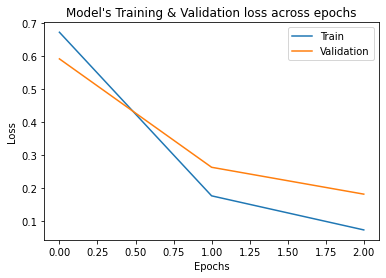

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


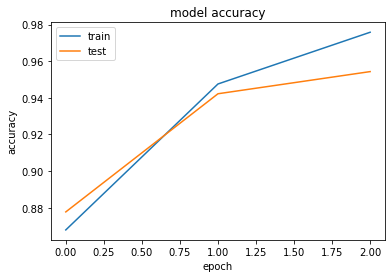

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
